# COIS3510 – Data Visualization Workshop 1

---

**Name:** Dikshith Reddy Macherla  
**Student ID:** 0789055  
**Course:** COIS3510 – Data Visualization  
**Date:** 30th September, 2025  

---

# Univariate Data Plots in Python

This notebook demonstrates various univariate data visualization techniques  
using Python libraries such as **Matplotlib**, **Seaborn**, and **Pandas**.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import gaussian_kde

## Column Chart

This chart shows monthly sales revenue using a vertical bar chart.  
Each bar represents revenue for a month from March to June.  

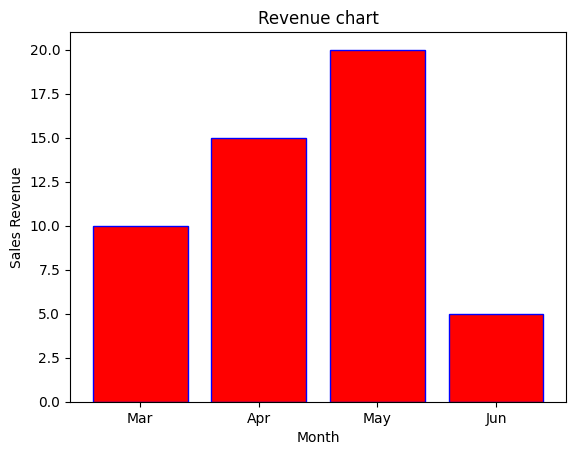

In [2]:
# Data
barchart_data = [10, 15, 20, 5]
barchart_labels = ["Mar", "Apr", "May", "Jun"]

# Create the bar chart
plt.bar(barchart_labels, barchart_data, color='red', edgecolor='blue')

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Sales Revenue")
plt.title("Revenue chart")

# Show the plot
plt.show()

## Barchart

This horizontal bar chart presents the same monthly sales revenue data.  
The orientation is switched to make it easier to compare months.  

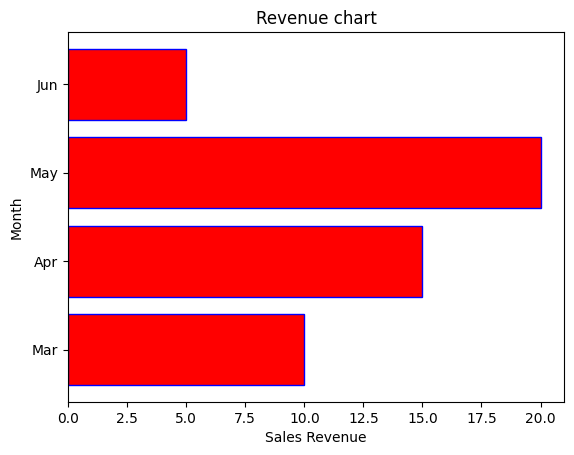

In [3]:
# Create the horizontal bar chart
plt.barh(barchart_labels, barchart_data, color='red', edgecolor='blue')

# Add labels and title
plt.xlabel("Sales Revenue")
plt.ylabel("Month")
plt.title("Revenue chart")

# Show the plot
plt.show()

## Stacked Bar Chart

This stacked bar chart shows sales revenue for three regions (East, West, and North)  
across five months (March to July). Each horizontal bar is divided into segments,  
where each segment represents the contribution from one region.  

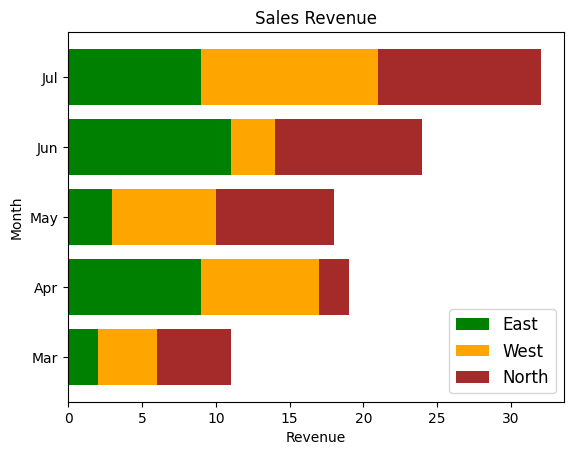

In [4]:
# Data
colors = ["green", "orange", "brown"]
months = ["Mar", "Apr", "May", "Jun", "Jul"]
regions = ["East", "West", "North"]

Values = np.array([
    [2, 9, 3, 11, 9],   # East
    [4, 8, 7, 3, 12],   # West
    [5, 2, 8, 10, 11]   # North
])

# Plot stacked horizontal bar chart
plt.barh(months, Values[0], color=colors[0])
plt.barh(months, Values[1], left=Values[0], color=colors[1])
plt.barh(months, Values[2], left=Values[0] + Values[1], color=colors[2])

# Add labels and title
plt.xlabel("Revenue")
plt.ylabel("Month")
plt.title("Sales Revenue")

# Add legend
plt.legend(regions, loc="lower right", fontsize=12)

# Show the plot
plt.show()


## Pie Chart

This pie chart shows sales distribution by province.  
Each slice represents the proportion of total sales for a province.  
Labels are displayed with percentages.  

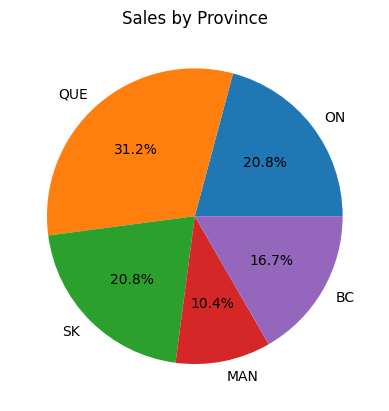

In [5]:
# Data
slices = [10, 15, 10, 5, 8]
labels = ["ON", "QUE", "SK", "MAN", "BC"]

# Create pie chart
plt.pie(slices, labels=labels, autopct='%1.1f%%')

# Add title
plt.title("Sales by Province")

# Show the plot
plt.show()

## Boxplot

A boxplot visualizes the distribution of a dataset.  
It highlights the **median**, the **quartiles**, and any potential **outliers**.  
Here we generate 1,000 normally distributed random data points  
with mean = 20.5 and standard deviation = 5.5.  

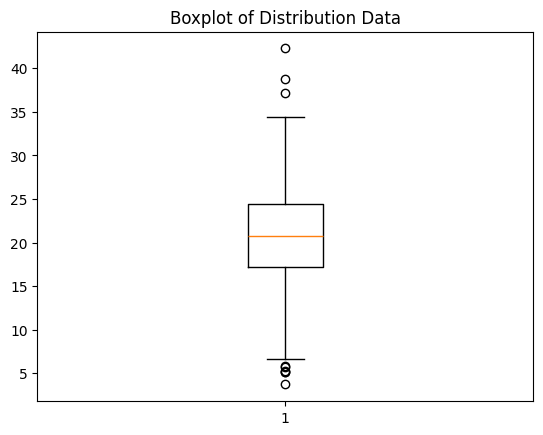

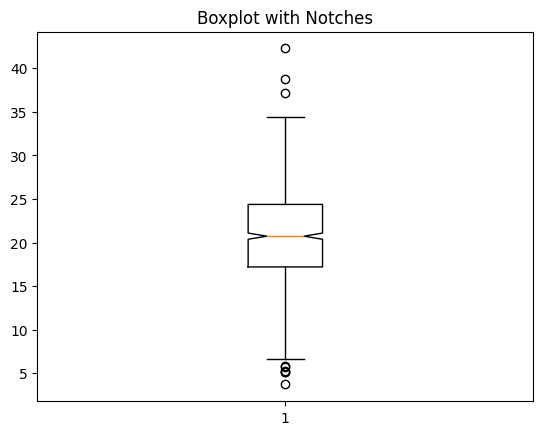

In [6]:
# Generate normally distributed data
np.random.seed(1)
distr_data = np.random.normal(20.5, 5.5, 1000)

# Basic boxplot
plt.boxplot(distr_data)
plt.title("Boxplot of Distribution Data")
plt.show()

# Boxplot with notches
plt.boxplot(distr_data, notch=True)
plt.title("Boxplot with Notches")
plt.show()


## Histogram

A histogram shows the frequency distribution of a dataset.  
It groups the data into bins and displays how many values fall into each bin.  
Here we use the same normally distributed data generated earlier.  

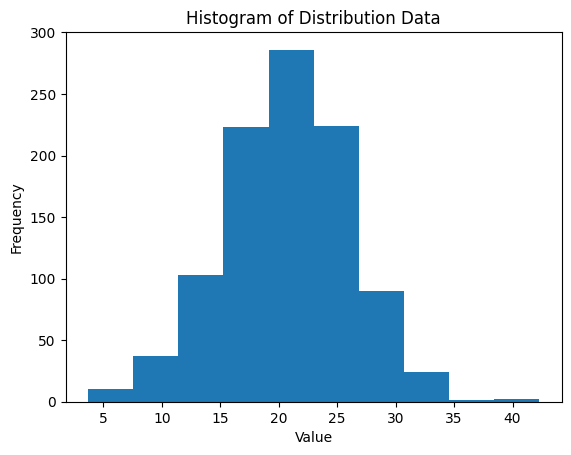

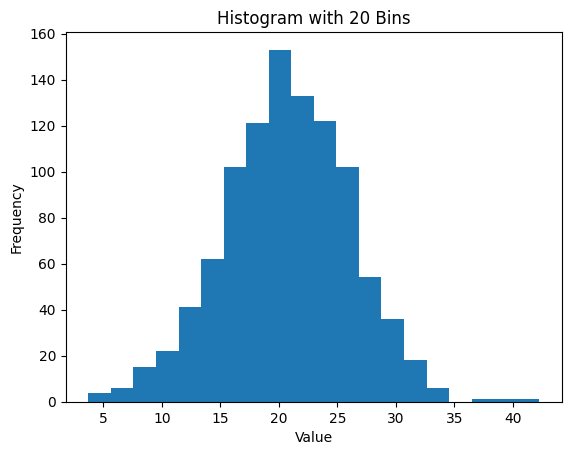

In [7]:
# Basic histogram
plt.hist(distr_data)
plt.title("Histogram of Distribution Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Histogram with more bins
plt.hist(distr_data, bins=20)
plt.title("Histogram with 20 Bins")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

## Density Plot

A density plot is a smoothed version of a histogram.  
It estimates the probability distribution of a continuous variable.  
Here we use kernel density estimation (KDE) on the same normally distributed data.  

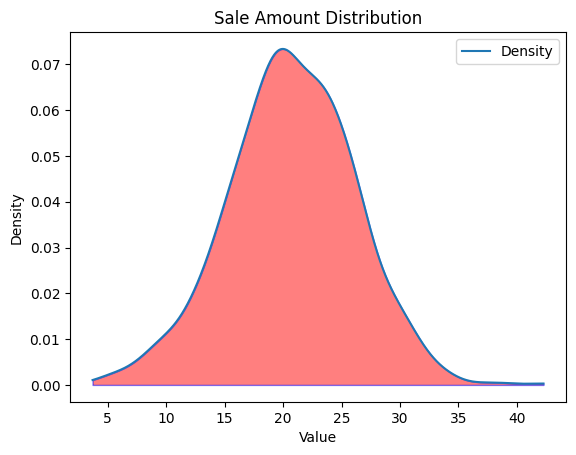

In [8]:
# Generate density using KDE
density = gaussian_kde(distr_data)
x = np.linspace(min(distr_data), max(distr_data), 1000)

# Plot density curve
plt.plot(x, density(x), label="Density")

# Fill area under the curve
plt.fill_between(x, density(x), color="red", edgecolor="blue", alpha=0.5)

# Add title and labels
plt.title("Sale Amount Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

## Beeswarm Plot

A beeswarm plot shows the distribution of data points,  
where each individual observation is represented as a dot.  
Unlike a histogram or density plot, it emphasizes the actual data points  
while avoiding overlap.  


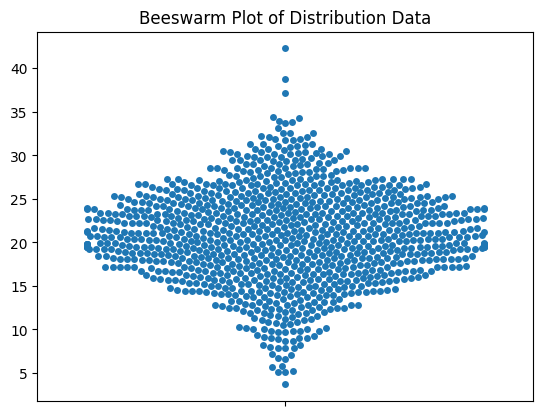

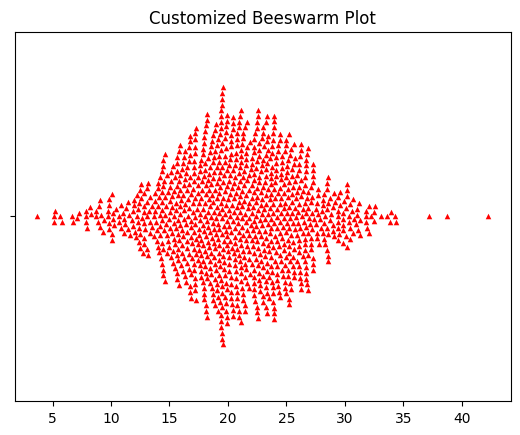

In [9]:
# Simple beeswarm plot
sns.swarmplot(distr_data)
plt.title("Beeswarm Plot of Distribution Data")
plt.show()

# Customized beeswarm plot (horizontal, red triangles, larger size)
sns.swarmplot(distr_data, color='red', marker='^', size=4, orient='h')
plt.title("Customized Beeswarm Plot")
plt.show()

## Violin Plot

A violin plot combines aspects of a boxplot and a density plot.  
It shows the distribution of the data across different categories.  
Here, we use the **ToothGrowth** dataset and compare tooth length (`len`)  
across different dose levels (`dose`).  

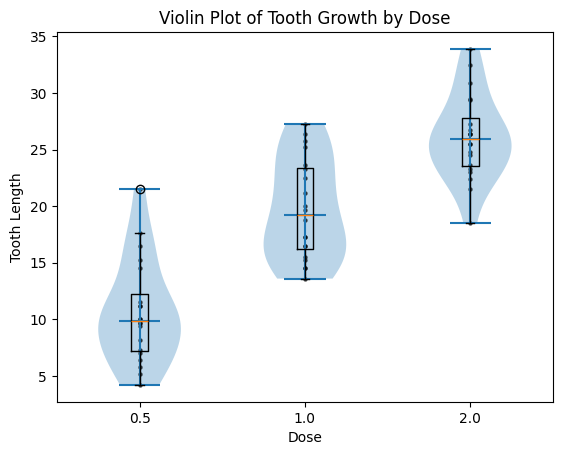

In [10]:
# Load ToothGrowth dataset from GitHub
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/ToothGrowth.csv"
data = pd.read_csv(url)

# Convert 'dose' to categorical
data['dose'] = data['dose'].astype('category')

# Group data by dose
grouped_data = [group['len'].values for _, group in data.groupby('dose', observed=True)]

# Create violin plot
plt.violinplot(grouped_data, showmeans=False, showmedians=True)

# Add boxplot on top
plt.boxplot(grouped_data, positions=[1, 2, 3], widths=0.1)

# Add scatter points for individual observations
for i, group in enumerate(grouped_data, start=1):
    plt.scatter([i] * len(group), group, color='black', s=5, alpha=0.6)

# Customize axes
plt.xticks([1, 2, 3], ['0.5', '1.0', '2.0'])
plt.xlabel('Dose')
plt.ylabel('Tooth Length')
plt.title('Violin Plot of Tooth Growth by Dose')

# Show plot
plt.show()